In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
job_salary = pd.read_csv("data/Data Science Salary 2021 to 2023.csv")
job_salary.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [70]:
data_cleaned = pd.read_csv("data/data_cleaned_2021.csv")
data_cleaned.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


In [4]:
data_cleaned.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

# Three hypotheses

1 - From 2020 to 2023, data scientist salaries increased over the years

2 - The more skills the higher the salary

3 - Data scientist salary vs degree

# First Hypotheses

In [5]:
yearGroup = job_salary.groupby('work_year').agg('mean')
yearGroup = yearGroup.drop(['salary'], axis=1)
yearGroup.head()

,salary_in_usd
work_year,
2020,92302.631579
2021,94087.208696
2022,133379.510804
2023,148954.558413


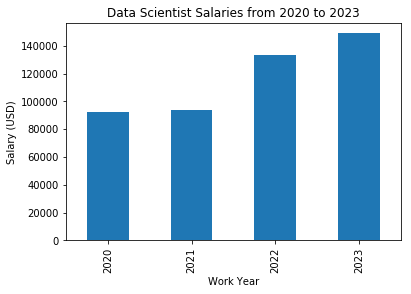

In [6]:
yearGroup.plot.bar(use_index=True, y = 'salary_in_usd', legend = False, 
                   title = "Data Scientist Salaries from 2020 to 2023")
plt.xlabel('Work Year')
plt.ylabel("Salary (USD)")
plt.show()

As you can see in the bar plot above, year over year data scientist average salaries increase

C:\Users\mzkan\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1395: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


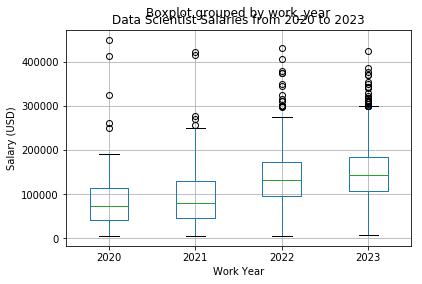

In [7]:
job_salary.boxplot(by = 'work_year', column=["salary_in_usd"])
plt.xlabel('Work Year')
plt.ylabel("Salary (USD)")
plt.title("Data Scientist Salaries from 2020 to 2023")
plt.show()

# Hypothesis 1: How does the number of skills possessed relate to salary levels in data scientist roles?

In [71]:
data_cleaned[['Python', 'spark', 'aws', 'excel','sql', 'sas', 'keras', 'pytorch', 'scikit',
             'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'Avg Salary(K)']]
#yearGroup = yearGroup.drop(['salary'], axis=1)
#groupSkills.head()

,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,Avg Salary(K)
0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,72.0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,87.5
2,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,85.0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76.5
4,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,114.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,84.5
738,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,102.5
739,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,73.5
740,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,127.5


In [72]:
max(data_cleaned['Avg Salary(K)'])

254.0

In [73]:
data_cleaned["Skill Sum"] = data_cleaned['Python'] + data_cleaned['spark'] + data_cleaned['aws'] +\
                            data_cleaned['excel'] + data_cleaned['sql'] + data_cleaned['sas'] +\
                            data_cleaned['keras'] + data_cleaned['pytorch'] + data_cleaned['scikit'] +\
                            data_cleaned['tensor'] + data_cleaned['hadoop'] + data_cleaned['tableau'] +\
                            data_cleaned['bi'] + data_cleaned['flink'] + data_cleaned['mongo']

In [74]:
data_cleaned['Avg Salary(K)'] = data_cleaned['Avg Salary(K)'] * 1000

In [75]:
data_cleaned[['Skill Sum', 'Avg Salary(K)']].head()

,Skill Sum,Avg Salary(K)
0,5,72000.0
1,1,87500.0
2,5,85000.0
3,1,76500.0
4,4,114500.0


In [76]:
skillGroup = data_cleaned.groupby('Skill Sum').agg('median')
skillSalary = pd.DataFrame(skillGroup['Avg Salary(K)'])
skillSalary.head()

,Avg Salary(K)
Skill Sum,
0,81000.0
1,87500.0
2,98000.0
3,97500.0
4,101250.0


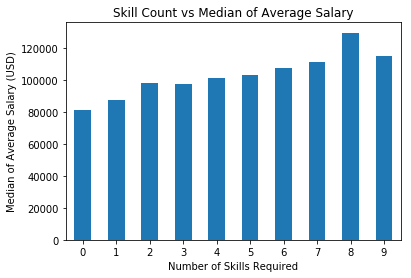

In [79]:
skillSalary.plot.bar(legend = False, title = "Skill Count vs Median of Average Salary")
plt.xlabel('Number of Skills Required')
plt.ylabel("Median of Average Salary (USD)")
plt.xticks(rotation=0)
plt.show()

What's informative about this view: This view shows as the number of skills required increases, the average data scientist salary increases as well. Except for having two skills required, it seems to have a higher average salary than having five skills required. This view is helpful in gaining an understanding of how the number of skills impacts your average salary and so you can aim for your desired salary by increasing the number of skills you know.

What could be improved about this view:  How much does each skill individually affect the average salary would be very beneficial as at the moment, you cannot tell which combinations of required skills are getting those average salary. There could be 1 major skill across the board or many minor ones.


In [80]:
degree_mapping = {
    'p': 'P',
    'm': 'M',
    'na': 'NR',
}
data_cleaned['Degree'] = data_cleaned['Degree'].str.strip().str.lower().map(degree_mapping)

In [81]:
hypothesis_data = data_cleaned[['Skill Sum', 'Avg Salary(K)', 'Degree']]
hypothesis_data = hypothesis_data[hypothesis_data['Degree'] != "NR"]
hypothesis_data.head()

,Skill Sum,Avg Salary(K),Degree
0,5,72000.0,M
1,1,87500.0,M
2,5,85000.0,M
7,7,114000.0,M
8,0,61000.0,P


In [82]:
import matplotlib.pyplot as plt

grouped_data = hypothesis_data.groupby(['Degree', 'Skill Sum'])['Avg Salary(K)'].median().unstack()

In [83]:
grouped_data

Skill Sum,0,1,2,3,4,5,6,7,8,9
Degree,,,,,,,,,,
M,86500.0,93500.0,100500.0,105500.0,96000.0,105500.0,116000.0,102500.0,125500.0,102000.0
P,84500.0,98000.0,147500.0,118000.0,104250.0,161750.0,148500.0,150500.0,123750.0,NaN


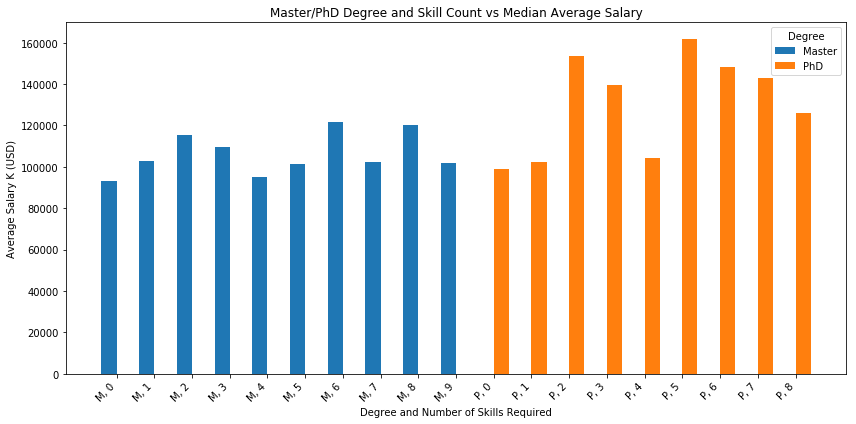

In [85]:
hypothesis_data['Degree_Skill'] = hypothesis_data['Degree'] + ', ' + hypothesis_data['Skill Sum'].astype(str)

# Pivot the data to have "M, 0" and "P, 0" as columns
pivot_data = hypothesis_data.pivot_table(index='Degree_Skill', columns='Degree', values='Avg Salary(K)')

# Sort the index to have "M, 0" next to "P, 0," "M, 1" next to "P, 1," and so on
pivot_data = pivot_data.reindex(sorted(pivot_data.index))

# Get the unique degree_skill combinations for the x-axis
degree_skills = pivot_data.index

# Set the bar width and positions
bar_width = 0.4
bar_positions = np.arange(len(degree_skills))

# Create the grouped bar chart
plt.figure(figsize=(12, 6))

plt.bar(bar_positions - bar_width/2, pivot_data['M'], width=bar_width, label='Master')
plt.bar(bar_positions + bar_width/2, pivot_data['P'], width=bar_width, label='PhD')

# Set labels and title
plt.xlabel('Degree and Number of Skills Required')
plt.ylabel('Average Salary K (USD)')
plt.title('Master/PhD Degree and Skill Count vs Median Average Salary')

# Set the x-axis ticks and labels
plt.xticks(bar_positions, degree_skills, rotation=45, ha="right")

# Set the modified legend labels
plt.legend(title='Degree')

# Show the plot
plt.tight_layout()
plt.show()

What's informative about this view: This view breaks down the number of skills required with Masters vs PhD by average salary. You can see the average salaries are greater for each group of numbers of skills and PhD degree vs Masters. 


What could be improved about this view:  This view can be improved by having the Master vs PhD bar side by side. For example, (M,0) and (P,0) as that will make comparison much easier on the audience looking at the visualization. Lastly, to somehow account for the number of data points in each of these categories.

Conclusion: Yes, these views and data points support the hypothesis. These views suggest that the more skills a job requires, the higher average salary is. Secondly, the more education a job requires, the higher average salary is as well. 

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [87]:
nice = data_cleaned[['Python', 'spark', 'aws', 'excel','sql', 'sas', 'keras', 'pytorch', 'scikit',
             'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'Degree','Avg Salary(K)']]

nice = nice[nice['Degree'] != "NR"]

In [88]:
nice.head()

,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,Degree,Avg Salary(K)
0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,M,72000.0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,M,87500.0
2,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,M,85000.0
7,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,M,114000.0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,P,61000.0


In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

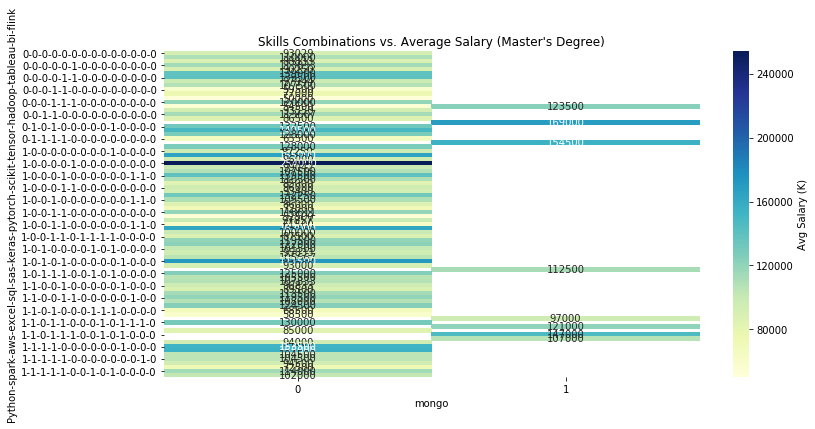

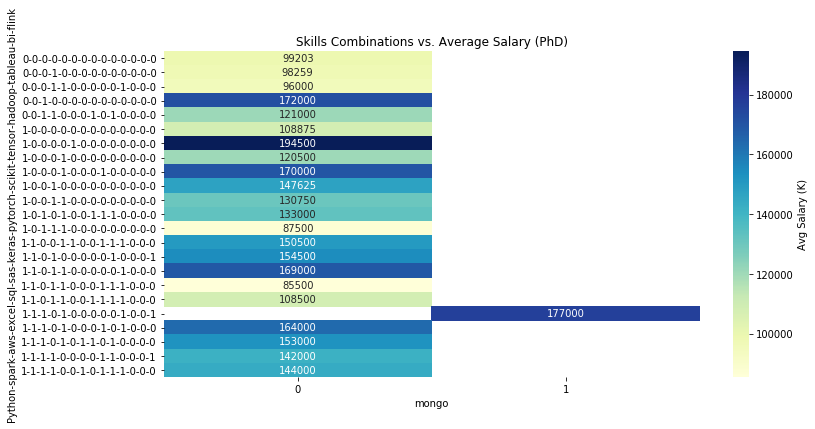

In [36]:
df_m = nice[nice['Degree'] == 'M']
df_p = nice[nice['Degree'] == 'P']

pivot_table_m = df_m.drop(columns='Degree').groupby(df_m.columns[:-2].tolist())['Avg Salary(K)'].mean().unstack()
# Create a pivot table for skills combinations vs. average salary for PhD degree (P)
pivot_table_p = df_p.drop(columns='Degree').groupby(df_p.columns[:-2].tolist())['Avg Salary(K)'].mean().unstack()

# Create a heatmap for Master's degree
plt.figure(figsize=(12, 6))
plt.title("Skills Combinations vs. Average Salary (Master's Degree)")
sns.heatmap(pivot_table_m, annot=True, cmap="YlGnBu", fmt=".0f", cbar_kws={'label': 'Avg Salary (K)'})
plt.show()

# Create a heatmap for PhD
plt.figure(figsize=(12, 6))
plt.title("Skills Combinations vs. Average Salary (PhD)")
sns.heatmap(pivot_table_p, annot=True, cmap="YlGnBu", fmt=".0f", cbar_kws={'label': 'Avg Salary (K)'})
plt.show()

In [89]:
nice['Avg Salary(K)'] = (nice['Avg Salary(K)'] / 1000).round(0).astype(int)

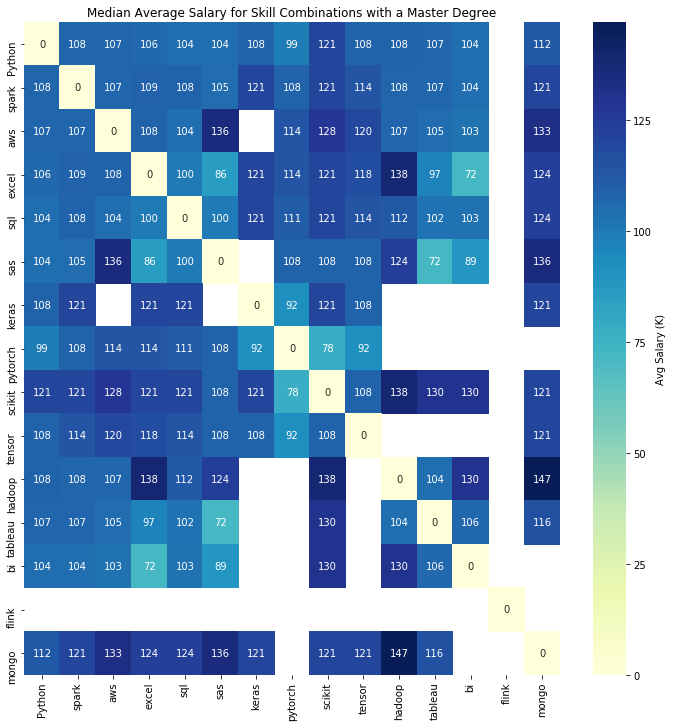

In [91]:
skills = ['Python', 'spark', 'aws', 'excel','sql', 'sas', 'keras', 'pytorch', 'scikit',
             'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo']


average_salaries = []

n_skills = len(skills)
average_salaries = np.zeros((n_skills, n_skills))

for i in range(n_skills):
    for j in range(n_skills):
        if i != j:
            skill1 = skills[i]
            skill2 = skills[j]
            avg_salary = nice[(nice[skill1] == 1) & (nice[skill2] == 1) & (nice["Degree"] == "M")]["Avg Salary(K)"].median()
            average_salaries[i][j] = avg_salary
            

# Create a heatmap
plt.figure(figsize=(12, 12))
plt.title("Median Average Salary for Skill Combinations with a Master Degree")
sns.heatmap(average_salaries, annot=True, xticklabels=skills, yticklabels=skills, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Avg Salary (K)'})
plt.show()

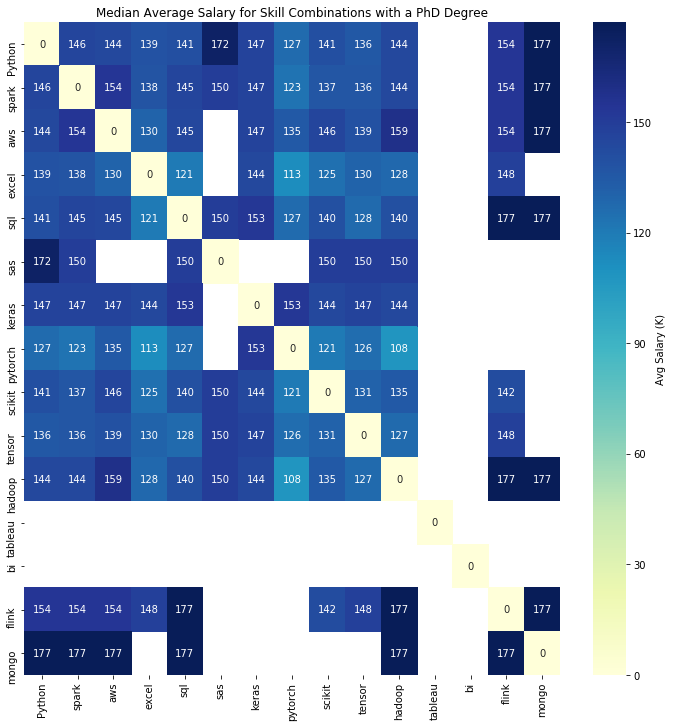

In [92]:
skills = ['Python', 'spark', 'aws', 'excel','sql', 'sas', 'keras', 'pytorch', 'scikit',
             'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo']


average_salaries = []

n_skills = len(skills)
average_salaries = np.zeros((n_skills, n_skills))

for i in range(n_skills):
    for j in range(n_skills):
        if i != j:
            skill1 = skills[i]
            skill2 = skills[j]
            avg_salary = nice[(nice[skill1] == 1) & (nice[skill2] == 1) & (nice["Degree"] == "P")]["Avg Salary(K)"].mean()
            average_salaries[i][j] = avg_salary
            

# Create a heatmap
plt.figure(figsize=(12, 12))
plt.title("Median Average Salary for Skill Combinations with a PhD Degree")
sns.heatmap(average_salaries, annot=True, xticklabels=skills, yticklabels=skills, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Avg Salary (K)'})
plt.show()

In [23]:
X = nice.iloc[:, :-1]  # Exclude Avg Salary(K)
y = nice['Avg Salary(K)']

In [24]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'P'

In [52]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [53]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1201491718.0135353
R-squared: 0.12099571293703548


In [54]:
# Print the coefficients (skill contributions)
coefficients = model.coef_
for skill, coef in zip(X.columns, coefficients):
    print(f"{skill}: {coef}")

Python: 24846.364654285804
spark: -949.4479727889358
aws: 11503.118516136376
excel: -3485.977156922503
sql: -10845.206514863714
sas: 22740.80791266337
keras: -4272.835726135909
pytorch: -14658.154550147501
scikit: 9770.477438926004
tensor: 14291.949334465624
hadoop: 2863.260772118536
tableau: -8033.119918761736
bi: -6364.19986540324
flink: -9172.135537793618
mongo: 3480.1092459776096


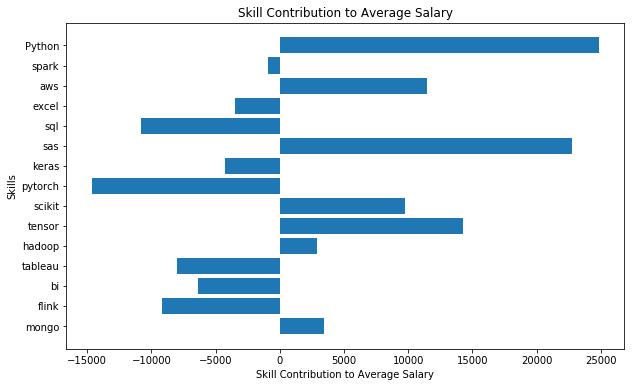

In [55]:
coefficients = model.coef_

# Create a bar chart to visualize skill contributions
plt.figure(figsize=(10, 6))
plt.barh(X.columns, coefficients)
plt.xlabel('Skill Contribution to Average Salary')
plt.ylabel('Skills')
plt.title('Skill Contribution to Average Salary')
plt.gca().invert_yaxis()  # Invert y-axis to show the most influential skills at the top
plt.show()

What's informative about this view: This view shows the breakdown of each skills contribution to the average salary. Skills with higher positive coefficients contribute more to a higher average salary, while skills with higher negative coefficients contribute more to a lower average salary.

What could be improved about this view:  This view was made by creating a simple linear regression model, which is a reasonable starting point. There could be other models to use, more data, and checking how many data points we have for each of these skills.